In [23]:
import sys, pickle
sys.path.insert(0, "libs")

import os, pickle, csv # import packages for file I/O
import time # package to help keep track of calculation time

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

import scipy
import scipy.stats as sst
from scipy.special import comb
from scipy.integrate import simpson
from scipy.signal import argrelextrema

from random import choice
from fnmatch import fnmatch

from libs.utils import *
from libs.finiteTheory import *
from visualizations import *
from libs.utils import *
from robustnessSimulations import *
from performanceMeasures import *
from infiniteTheory import *
from finiteTheory import *

fvals = pickle.load(open('data/fvalues.p', 'rb'))
pvals = pickle.load(open('data/Pvalues.p', 'rb'))

def edge_files(removal = "random", theory = False, nwks_list = ["AmadMyJn12-51.adj"]):
    for file_name in nwks_list:
        print(file_name)
        file = open(file_name, "r")
        content=file.readlines()
        node_list=[]
        edge_list=np.empty(len(content),dtype=object)
        for i in range(len(content)):
            edge = content[i].strip()
            edge = edge.split(" ")
            edge_list[i] = np.zeros(2)
            edge_list[i][0] = int(edge[0])
            edge_list[i][1] = int(edge[1])
            for j in range(2):
                node_list.append(int(edge[j]))
        n = max(node_list)+1
        adj=np.zeros((n,n))

        for k in range(len(edge_list)):
            adj[int(edge_list[k][0]),int(edge_list[k][1])] = 1
            adj[int(edge_list[k][1]),int(edge_list[k][0])] = 1

        G_0 = nx.from_numpy_array(adj)
        G = G_0.copy()
        #nx.draw(G)
        #plt.show()

        p = len(edge_list)/scipy.special.comb(n,2)
        remove_strat = [removal]
        if theory == True:
            fig = plot_graphs(numbers_of_nodes=[n], edge_probabilities=[p],
                graph_types=['ER'], remove_strategies=[removal],
                performance='relative LCC', num_trials=100,
                smooth_end=False, forbidden_values=[], fdict=fvals, lcc_method_main = "alice", savefig='')
        else:
            fig = plt.figure(1,2, figsize=(8, 8))

        fig.savefig(file_name[:-4] + ".png")

        x_array = np.arange(0,n)/n
        averaged_data = np.zeros(n)
        for j_2 in range(100):
            G = G_0.copy()
            #print(list(G.nodes()), "nodes")
            data_array = np.zeros(n, dtype=float)
            # print("averaged data", averaged_data)
            # print("data array", data_array)
            for i_2 in range(n):
                data_array[i_2] = len(max(nx.connected_components(G), key=len)) / (n-i_2)
                # find a node to remove
                if removal == "random":
                    if G.number_of_nodes() != 0:
                        v = choice(list(G.nodes()))
                        G.remove_node(v)
                        #print(v)
                elif removal == "attack":
                    if G.number_of_nodes() != 0:
                        v = sorted(G.degree, key=lambda x: x[1], reverse=True)[0][0]
                        G.remove_node(v)

            averaged_data+=data_array
            # print("averaged data", averaged_data)
            # print("data array", data_array)
        print(x_array,"xarray")
        averaged_data /= 100
        plt.plot(x_array,averaged_data,label="real")
        plt.legend()
        fig.savefig(file_name[:-4]+".png")

        file.close()


def folder_files(removal="random", theory=False, nwkspath = r'C:\Users\jj\Downloads\GitHub\small-perc\nwks small perc'):

    root = r'C:\Users\jj\Downloads\GitHub\small-perc\nwks small perc'
    pattern = "*.adj"
    pattern2 = "*.arc"
    nwks_list = []

    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern):
                #print(os.path.join(path, name))
                nwks_list.append(os.path.join(path, name))
            elif fnmatch(name, pattern2):
                nwks_list.append(os.path.join(path, name))
    print(len(nwks_list))
    if theory == True:
        fig = plot_graphs(numbers_of_nodes=[n], edge_probabilities=[p],
                          graph_types=['ER'], remove_strategies=[removal],
                          performance='relative LCC', num_trials=100,
                          smooth_end=False, forbidden_values=[], fdict=fvals, lcc_method_main="alice", savefig='')
    else:
        os.chdir(r'C:\Users\jj\Downloads\GitHub\small-perc\nwks small perc')
        fig = plt.figure(figsize=(8, 8))

    for file_name in nwks_list[:10]:
        # os.chdir(nwkspath)
        # a = '\\'
        # newpath = nwkspath + a + file_name
        # if os.path.isfile(newpath):
        #     if newpath[:-3] in ["adj", "arc"]:
        #         path = os.getcwd()
        #         print(path)
        if True:
                print(file_name)
                file = open(file_name, "r")
                content = file.readlines()

                # ignore big graphs
                if len(content) >= 100 or len(content) == 0:
                    file.close()

                else:
                    node_list = []
                    edge_list = np.empty(len(content), dtype=object)
                    if len(content[0].strip().split(" ")) > 2:
                        file.close()
                    for i in range(len(content)):
                        edge = content[i].strip()
                        edge = edge.split(" ")
                        edge_list[i] = np.zeros(2)
                        edge_list[i][0] = int(edge[0])
                        edge_list[i][1] = int(edge[1])
                        for j in range(2):
                            node_list.append(int(edge[j]))

                    n = max(node_list) + 1
                    adj = np.zeros((n, n))

                    for k in range(len(edge_list)):
                        adj[int(edge_list[k][0]), int(edge_list[k][1])] = 1
                        adj[int(edge_list[k][1]), int(edge_list[k][0])] = 1

                    G_0 = nx.from_numpy_array(adj)
                    G = G_0.copy()
                    # nx.draw(G)
                    # plt.show()

                    p = len(edge_list) / scipy.special.comb(n, 2)
                    remove_strat = [removal]

                    x_array = np.arange(0, n) / n
                    averaged_data = np.zeros(n)
                    for j_2 in range(100):
                        G = G_0.copy()
                        # print(list(G.nodes()), "nodes")
                        data_array = np.zeros(n, dtype=float)
                        # print("averaged data", averaged_data)
                        # print("data array", data_array)
                        for i_2 in range(n):
                            data_array[i_2] = len(max(nx.connected_components(G), key=len)) / (n - i_2)
                            # find a node to remove
                            if removal == "random":
                                if G.number_of_nodes() != 0:
                                    v = choice(list(G.nodes()))
                                    G.remove_node(v)
                                    # print(v)
                            elif removal == "attack":
                                if G.number_of_nodes() != 0:
                                    v = sorted(G.degree, key=lambda x: x[1], reverse=True)[0][0]
                                    G.remove_node(v)

                        averaged_data += data_array
                        # print("averaged data", averaged_data)
                        # print("data array", data_array)
                    print(x_array, "xarray")
                    averaged_data /= 100
                    plt.plot(x_array, averaged_data, label= file_name+"nodes: "+str(n))
                    plt.legend()

                    file.close()
        # elif os.path.exists(newpath):
        #     os.chdir(newpath)
        #     folder_files(removal = removal, theory = theory, nwkspath = newpath)
        # else:
        #     break
    fig.supxlabel("percent nodes removed")
    fig.supylabel("Rel LCC")
    fig.savefig("realnwks.png")
    print(os.getcwd())

def edge_files1graph(removal="random", theory=False, nwks_list=["AmadMyJn12-51.adj"]):
    if theory == True:
        fig = plot_graphs(numbers_of_nodes=[n], edge_probabilities=[p],
                          graph_types=['ER'], remove_strategies=[removal],
                          performance='relative LCC', num_trials=100,
                          smooth_end=False, forbidden_values=[], fdict=fvals, lcc_method_main="alice", savefig='')
    else:
        fig = plt.figure(figsize=(8, 8))

    for file_name in nwks_list:
        print(file_name)
        file = open(file_name, "r")
        content = file.readlines()
        node_list = []
        edge_list = np.empty(len(content), dtype=object)
        for i in range(len(content)):
            edge = content[i].strip()
            edge = edge.split(" ")
            edge_list[i] = np.zeros(2)
            edge_list[i][0] = int(edge[0])
            edge_list[i][1] = int(edge[1])
            for j in range(2):
                node_list.append(int(edge[j]))
        n = max(node_list) + 1
        adj = np.zeros((n, n))

        for k in range(len(edge_list)):
            adj[int(edge_list[k][0]), int(edge_list[k][1])] = 1
            adj[int(edge_list[k][1]), int(edge_list[k][0])] = 1

        G_0 = nx.from_numpy_array(adj)
        G = G_0.copy()
        # nx.draw(G)
        # plt.show()

        p = len(edge_list) / scipy.special.comb(n, 2)
        remove_strat = [removal]

        x_array = np.arange(0, n) / n
        averaged_data = np.zeros(n)
        for j_2 in range(100):
            G = G_0.copy()
            # print(list(G.nodes()), "nodes")
            data_array = np.zeros(n, dtype=float)
            # print("averaged data", averaged_data)
            # print("data array", data_array)
            for i_2 in range(n):
                data_array[i_2] = len(max(nx.connected_components(G), key=len)) / (n - i_2)
                # find a node to remove
                if removal == "random":
                    if G.number_of_nodes() != 0:
                        v = choice(list(G.nodes()))
                        G.remove_node(v)
                        # print(v)
                elif removal == "attack":
                    if G.number_of_nodes() != 0:
                        v = sorted(G.degree, key=lambda x: x[1], reverse=True)[0][0]
                        G.remove_node(v)

            averaged_data += data_array
            # print("averaged data", averaged_data)
            # print("data array", data_array)
        print(x_array, "xarray")
        averaged_data /= 100
        plt.plot(x_array, averaged_data, label= file_name+"nodes: "+str(n))
        plt.legend()

        file.close()
    fig.supxlabel("percent nodes removed")
    fig.supylabel("Rel LCC")
    fig.savefig("realnwks.png")

def read_from_adj(filename):
    
    file = open(filename, "r")
    content = file.readlines()

    # convert into networkx graph
    node_list = []
    edge_list = [] #np.empty(len(content), dtype=object)
    
    if len(content) == 0:
        G = nx.Graph()
        return G
    
    edge_count = 0
    for i in range(len(content)):
        
        edge = content[i].strip()
        edge = edge.split(" ")
        
        if len(edge)==2:
            
            edge_list.append([int(edge[0]), int(edge[1])])
            node_list.append(int(edge[0]))
            node_list.append(int(edge[1]))

    node_list = list(set(node_list))
    
    if 0 in node_list:
        n = max(node_list) + 1
        offset = 0
    else:
        n = max(node_list)
        offset = min(node_list)
        
    adj = np.zeros((n, n))
        
    for k in range(len(edge_list)):
        adj[int(edge_list[k][0])-offset, int(edge_list[k][1])-offset] = 1
        adj[int(edge_list[k][1])-offset, int(edge_list[k][0])-offset] = 1

    G = nx.from_numpy_array(adj)
    file.close()
            
    return G

    
def random_removal(G0):
    
    # make a copy of input graph
    G = G0.copy()
    n = G.number_of_nodes()
    
    data_array = np.zeros(n, dtype=float)
    
    for i in range(n):
        # get LCC size
        data_array[i] = len(max(nx.connected_components(G), key=len)) / (n - i)
        # find a random node to remove
        if G.number_of_nodes() != 0:
            v = choice(list(G.nodes()))
            G.remove_node(v)
            
    return data_array

            
def targeted_removal(G0):
    
    # make a copy of input graph
    G = G0.copy()
    n = G.number_of_nodes()
    
    data_array = np.zeros(n, dtype=float)
    for i in range(n):
        # get LCC size
        data_array[i] = len(max(nx.connected_components(G), key=len)) / (n - i)
        # find highest-degree node and remove it
        if G.number_of_nodes() != 0:
            v = sorted(G.degree, key=lambda x: x[1], reverse=True)[0][0]
            G.remove_node(v)
            
    return data_array

                        
def AUCTable(nwks_list, num_tries=100, max_size=50):

    auc_table = np.zeros((len(nwks_list),7), dtype=object)
    
    counter = 0
    for i, nwpath in enumerate(nwks_list):
        
        # extract file name from file path
        nwname = os.path.basename(nwpath)
        # add name of network to table
        auc_table[counter,0] =  str(nwname)
        # read graph from ".adj" file
        print('{} {}'.format(i, nwname), end='')
        G = read_from_adj(nwpath)
        # set p for G(n,p) graph
        n = G.number_of_nodes()
        m = G.number_of_edges()
        p = m / scipy.special.comb(n, 2)
        print(' has (n,m) = ({}, {})'.format(n, m), end='')
        
        # check if network meets size limitation
        if n > max_size:
            print (' --- omit')
            continue
        elif n < 2:
            print(' --- omit')
            continue
        else:
            print(' --- compute', end='')
            
        t0 = time.time()
        # add number of nodes and edges to info table
        auc_table[counter,1] = n
        auc_table[counter,2] = m

        # get data for random and targeted node removal 
        nw_r = np.nanmean([random_removal(G) for i in range(num_tries)], axis=0)
        nw_t = targeted_removal(G)
        
        # finite-theory results for random and targeted node removal
        theory_r = relSCurve(p, n, attack=False, reverse=True, lcc_method_relS="pmult")
        theory_t = relSCurve(p, n, attack=True, reverse=True, lcc_method_relS="pmult")
    
        # calculate AUCs
        results = [nw_r, theory_r, nw_t, theory_t]
        for i, array in enumerate(results): 
            # compute AUC and store in info table
            auc_table[counter,3+i] = scipy.integrate.simpson(array, dx=1/n)

        counter+=1
        print(' in {} s'.format(time.time()-t0))
        
    # remove empty rows from table
    auc_table2 = auc_table[:counter]

    # convert to data frame and name its columns
    df = pd.DataFrame(auc_table2)
    df.columns = ["network", "nodes", "edges", "real rand auc", "real attack auc",
                  "fin theory rand auc", "fin theory attack auc"]
    #print(info_table)
    return df

def nhistogram(nwks_list, num_tries=100, max_size=10, max_id=100):

    table = np.zeros((len(nwks_list),7), dtype=object)
    list0 = []
    
    counter = 0
    for i, nwpath in enumerate(nwks_list[:max_id]):
        
        # extract file name from file path
        nwname = os.path.basename(nwpath)
        # add name of network to table
        table[counter,0] =  str(nwname)
        # read graph from ".adj" file
        print('{} {}'.format(i, nwname), end='')
        G = read_from_adj(nwpath)
        # set p for G(n,p) graph
        n = G.number_of_nodes()
        list0.append(n)
    return list0


def fullDataTable(nwks_list, num_tries=100, max_size=10, max_id=100):

    table = np.zeros((len(nwks_list),7), dtype=object)
    
    counter = 0
    for i, nwpath in enumerate(nwks_list[:max_id]):
        
        # extract file name from file path
        nwname = os.path.basename(nwpath)
        # add name of network to table
        table[counter,0] =  str(nwname)
        # read graph from ".adj" file
        print('{} {}'.format(i, nwname), end='')
        G = read_from_adj(nwpath)
        # set p for G(n,p) graph
        n = G.number_of_nodes()
        m = G.number_of_edges()
        p = m / scipy.special.comb(n, 2)
        print(' has (n,m) = ({}, {})'.format(n, m), end='')
        
        # check if network meets size limitation
        if n > max_size:
            print (' --- omit')
            continue
        elif n < 2:
            print(' --- omit')
            continue
        else:
            print(' --- compute', end='')
            
        t0 = time.time()
        # add number of nodes and edges to info table
        table[counter,1] = n
        table[counter,2] = m

        # get data for random and targeted node removal 
        nw_r = np.nanmean([random_removal(G) for i in range(num_tries)], axis=0)
        nw_t = targeted_removal(G)
        
        # finite-theory results for random and targeted node removal
        theory_r = relSCurve(p, n, attack=False, reverse=True, lcc_method_relS="pmult")
        theory_t = relSCurve(p, n, attack=True, reverse=True, lcc_method_relS="pmult")
        print('result types', type(theory_r), type(theory_t))
    
        # calculate AUCs
        results = [nw_r, theory_r, nw_t, theory_t]
        for i, array in enumerate(results): 
            print('array type', type(array))
            # compute AUC and store in info table
            table[counter,3+i] = array

        counter+=1
        print(' in {} s'.format(time.time()-t0))
        
    # remove empty rows from table
    table2 = table[:counter]
    
    #print('type in new table', type(table2[3,3]))

    # convert to data frame and name its columns
    df = pd.DataFrame(table2)
    df.columns = ["network", "nodes", "edges", "real rand auc", "real attack auc",
                  "fin theory rand auc", "fin theory attack auc"]
    #print(info_table)
    return df

In [15]:
root = os.path.join(os.getcwd(), 'nwks small perc')
print(root)
pattern = "*.adj"
pattern2 = "*.arc"
nwks_list2 = []

for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            # print(os.path.join(path, name))
            nwks_list2.append(os.path.join(path, name))
        # elif fnmatch(name, pattern2):
        #     nwks_list2.append(os.path.join(path, name)

C:\Users\f00689q\My Drive\jupyter\small-perc\nwks small perc


In [16]:
len(nwks_list2)

2137

0 10_19.adj1 american_revolution.adj2 birdtrade_a.adj3 birdtrade_b.adj4 birdtrade_c.adj5 celegans_neural.adj6 chile_powergrid.adj7 dolphin.adj8 drugspider_caffeine.adj9 drugspider_chloralhydrate.adj10 earth.adj11 earth_moon_mars.adj12 east_europe_rr.adj13 farmer.adj14 flights.adj15 football.adj16 frozen.adj17 game_of_thrones.adj18 gene_fusion.adj19 grape.adj20 hiv.adj21 icbm_silos.adj22 iceland.adj23 internet_cables.adj24 jazz.adj25 karate.adj26 latora_kindergarden.adj27 levi_strauss_myth1.adj28 lrock.adj29 madrid_terrorist.adj30 mejn_adjnoun.adj31 morrissey_godparent.adj32 mouse_visual_cortex1.adj33 mouse_visual_cortex2.adj34 nuclear.adj35 pdist.adj36 pdz_protein.adj37 physicians.adj38 pitts.adj39 polbooks.adj40 prison.adj41 ps2.adj42 rpm.adj43 s50_1.adj44 s50_2.adj45 s50_3.adj46 Sandi_authors.adj47 sociologists.adj48 taro.adj49 test_disconnected.adj50 tokstoy_rr.adj51 traficking.adj52 usa.adj53 weevil.adj54 windsurfers.adj55 word_of_mouth.adj56 ythan.adj57 zebra.adj58 adelaide_rail.a

(0.0, 200.0)

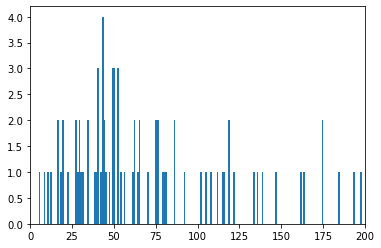

In [32]:
d=nhistogram(nwks_list2[:])
plt.hist(d,bins=max(d))
plt.xlim([0,200])

In [18]:
import time
t0 = time.time()
output = fullDataTable(nwks_list2[:])
print(time.time()-t0)
output.to_csv('fullData.csv', sep=',', index=False, encoding='utf-8')
output.to_pickle('fullData.p')

0 10_19.adj has (n,m) = (10, 20) --- computeresult types <class 'numpy.ndarray'> <class 'numpy.ndarray'>
array type <class 'numpy.ndarray'>
array type <class 'numpy.ndarray'>
array type <class 'numpy.ndarray'>
array type <class 'numpy.ndarray'>
 in 4.334701061248779 s
1 american_revolution.adj has (n,m) = (136, 3420) --- omit
2 birdtrade_a.adj has (n,m) = (42, 68) --- omit
3 birdtrade_b.adj has (n,m) = (39, 53) --- omit
4 birdtrade_c.adj has (n,m) = (34, 46) --- omit
5 celegans_neural.adj has (n,m) = (280, 1973) --- omit
6 chile_powergrid.adj has (n,m) = (466, 543) --- omit
7 dolphin.adj has (n,m) = (62, 159) --- omit
8 drugspider_caffeine.adj has (n,m) = (119, 190) --- omit
9 drugspider_chloralhydrate.adj has (n,m) = (52, 64) --- omit
10 earth.adj has (n,m) = (249, 1197) --- omit
11 earth_moon_mars.adj has (n,m) = (16, 57) --- omit
12 east_europe_rr.adj has (n,m) = (45, 91) --- omit
13 farmer.adj has (n,m) = (80, 77) --- omit
14 flights.adj has (n,m) = (456, 2799) --- omit
15 football

In [19]:
datafromfile = pd.read_pickle('fullData.p')

In [22]:
type(datafromfile.iloc[0][3])

numpy.ndarray

In [5]:
import time
t0 = time.time()
output = AUCTable(nwks_list2[:])
print(time.time()-t0)
output.to_csv('AUC.csv', sep=',', index=False, encoding='utf-8')

0 10_19.adj has (n,m) = (10, 20) --- compute in 4.59935998916626 s
1 american_revolution.adj has (n,m) = (136, 3420) --- omit
2 birdtrade_a.adj has (n,m) = (42, 68) --- compute

KeyboardInterrupt: 

In [ ]:
read_from_adj_debug('nwks small perc/wss/272.adj')

In [ ]:
def read_from_adj_debug(filename):
    
    file = open(filename, "r")
    content = file.readlines()

    # convert into networkx graph
    node_list = []
    edge_list = [] #np.empty(len(content), dtype=object)
    
    if len(content) == 0:
        G = nx.Graph()
        return G
    
    edge_count = 0
    for i in range(len(content)):
        
        edge = content[i].strip()
        edge = edge.split(" ")
        
        if len(edge)==2:
            
            edge_list.append([int(edge[0]), int(edge[1])])
            node_list.append(int(edge[0]))
            node_list.append(int(edge[1]))

    node_list = list(set(node_list))
    
    if 0 in node_list:
        n = max(node_list) + 1
        offset = 0
    else:
        n = max(node_list)
        offset = min(node_list)
        
    adj = np.zeros((n, n))
        
    for k in range(len(edge_list)):
        adj[int(edge_list[k][0])-offset, int(edge_list[k][1])-offset] = 1
        adj[int(edge_list[k][1])-offset, int(edge_list[k][0])-offset] = 1

    G = nx.from_numpy_array(adj)
    file.close()
            
    return G